# Project: Investigate a Dataset - [TMDb-Movies Data]
## (By Valentine Ezenwanne)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> The columns available are
> 1. id - The id number of the movie in the TMDb
> 2. imdb_id - The internet movie database id number
> 3. popularity - The number of people that know or watch the movies
> 4. budget - The money estimate set aside for the movie production
> 5. revenue - The money made made from the movie
> 6. original_title - The title of the movie
> 7. cast - The name of the actor/actresses in the movie
> 8. homepage - The website address of the movie
> 9. director - The name of the movie director
> 10. tagline - The tagline of the movie
> 11. overview - A little descriptiom of the movie
> 12. runtime - The time duration of the movie
> 13. genre - The film category
> 14. keyword - Keyword that are associated with the movie
> 15. production_companies - The company that produced the movie
> 16. release_date - The date the film was released
> 17. release_year - The year the film was released
> 18. vote_count - The number of imdb users who voted
> 19. vote_average - The weighted average vote for each movies 
> 20. budget_adj - The adjusted budget
> 21. revenue_adj - The adjusted revenue


### Question(s) for Analysis


>**Question 1:** What is the distribution of the budget, revenue and vote count?

>**Question 2:** Which year was movies released the most?

>**Question 3:** which genre has the highest budget year to year?

>**Question 4:** which genre has the highest revenue year to year?

>**Question 5:** Which genre are the most popular from year to year?

>**Question 6:** Which production companies have the largest budget year by year?

>**Question 7:** Which production companies have the largest revenue year by year?

>**Question 8:** What are the top three movies that have the largest budget year by year?

>**Question 9:** What are the top three movie that generated the largest revenue year by year?

>**Question 10:** What kind of properties are associated with movies that have high revenue?

>**Question 11:** What kind of properties are associated with movies with high rating?




In [7]:
# importing the packages for use; pandas, numpy, matplotlib, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
pd.set_option('display.max_columns', 50)


<a id='wrangling'></a>
## Data Wrangling

In [49]:
# Loading the dataset and printing out a few lines. 

df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Understanding the Dataset
> **Step 1** : The shape of dataset

In [50]:
# shape of the dataset
df.shape

(10866, 21)

- The dataset contains 10,866 rows and 21 columns. 
- There are 10,866 movies in our dataset

> **Step 2** : The datatypes of the variables 

In [76]:
# Getting the datatypes of each columns in the dataset
print(df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Assessment

#### Missing Values

In [52]:
# Finding missing values in the dataset

df.isna().sum().sort_values(ascending=True)

id                         0
release_year               0
vote_average               0
vote_count                 0
release_date               0
runtime                    0
budget_adj                 0
revenue_adj                0
original_title             0
revenue                    0
budget                     0
popularity                 0
overview                   4
imdb_id                   10
genres                    23
director                  44
cast                      76
production_companies    1030
keywords                1493
tagline                 2824
homepage                7930
dtype: int64

There are **9 columns** with **missing values**, they include:
*overview, imdb_id, genres, director, cast, production_companies, keywords, tagline, homepage*.    


#### Duplicated Values

In [53]:
# Finding any duplicates in the dataset

df.duplicated().sum()

1

- One duplicate found

In [54]:
# The code below retrieve the duplicate

df.loc[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Unique Values

In [55]:
# checking for unique values in the column genres

df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

- Most movies has more than one genres joined by a delimiter

In [178]:
# checking for unique values in the column production_companies

df['production_companies'].unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

- some movies has more than one production_companies joined by a delimiter

#### Data Assessment

1. Missing Values in 9 columns
2. One duplicated record
3. Incorrect datatype on release_year column
4. Incorrect datatype on budget_adj and revenue_adj

### Data Cleaning

#### Creating a copy

In [149]:
# create a copy of the dataset for cleaning

df_clean = df.copy()

In [150]:
# check if a copy has been created by displaying the first two head

df_clean.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Dropping unneccessary columns

In [151]:
# dropping six(6) unneccessary columns

df_clean.drop(['overview', 'keywords', 'tagline', 'homepage', 'cast', 'id', 'imdb_id'], axis=1, inplace=True)

#### Handling missing values

In [152]:
df_clean.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [156]:
# filling the missing values

df_clean.fillna({'genres': 'others', 'director': 'None', 'production_companies': 'None'}, inplace=True)

In [157]:
# Checking if there are still missing values

df_clean.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Changing incorrect datatype

In [158]:
# changing the datatype of release_date column to date

df_clean['release_date'] = df_clean['release_date'].astype('datetime64')

In [159]:
# confirming change in the datatype

df_clean.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

- The above result shows that the datatype for **release_date** have been changed to **datetime**

In [182]:
# changing the datatype of budget_adj and revenue_adj column to integer

df_clean['budget_adj'] = df_clean['budget_adj'].astype('int64')
df_clean['revenue_adj'] = df_clean['revenue_adj'].astype('int64')

In [183]:
# confirming change in the datatype

df_clean.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

- The above result shows that the datatype for budget_adj and revenue_adj have been changed to integer

#### Dropping duplicates

In [160]:
# dropping duplicates in the dataset

df_clean.drop_duplicates(inplace=True)

In [161]:
# Checking that the duplicate has been dropped
df_clean.duplicated().sum()

0

### Feature Engineering

In [163]:
# Extracting the first genre from the genres column

df_clean['genres'] = df_clean['genres'].apply(lambda x: x.split('|')[0])

In [164]:
# confirming the genre has been extracted

df_clean['genres'].head(15)

0              Action
1              Action
2           Adventure
3              Action
4              Action
5             Western
6     Science Fiction
7               Drama
8              Family
9              Comedy
10             Action
11    Science Fiction
12              Drama
13             Action
14             Action
Name: genres, dtype: object

In [165]:
# Extracting the first director name from the director column

df_clean['director'] = df_clean['director'].apply(lambda x: x.split('|')[0])

In [166]:
# confirming the director's name has been extracted

df_clean['director'].sample(10)

2141     Lauren Montgomery
2578       John Stephenson
4409            Tom Hooper
8276    Roger Spottiswoode
6981             Jay Roach
1394           Guy Ritchie
1273             Des Doyle
5483         Kirk De Micco
958        Ernie Barbarash
6432           Jeremy Haft
Name: director, dtype: object

In [167]:
# Extracting the first production_companies name from the its column

df_clean['production_companies'] = df_clean['production_companies'].apply(lambda x: x.split('|')[0])

In [168]:
# confirming the name of the first production companies has been extracted

df_clean['production_companies'].sample(10)

5110                     Yari Film Group
6326             Vulcan Productions Inc.
710                        Miramax Films
3394                    De Line Pictures
1260                                None
1723                     Warner Premiere
2531       Columbia Pictures Corporation
1781             I Hate Vday Productions
1356    Filmco International Productions
5883                               Film4
Name: production_companies, dtype: object

#### Data Shape

In [184]:
# Checking the shape of the dataset after cleaning

df_clean.shape

(10865, 14)

- The number of rows is reduced from 10,866 to 10,865
- The number of columns is reduced from 21 to 14 columns

## <a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kind of properties are associated with movies that have high revenue?)

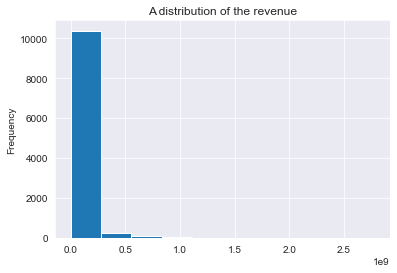

In [19]:
# To check the distribution of the revenue

df['revenue'].plot(kind='hist', title='A distribution of the revenue', xlabel='revenue', ylabel='frequency');

- The revenue is not distributed normally

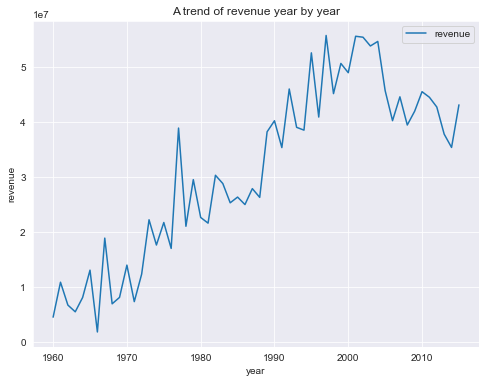

In [20]:
# To investigate the trend of revenue over the year

(df.groupby('release_year')[['revenue']]
     .mean()
     .plot(kind='line',
           figsize=(8, 6), 
           title='A trend of revenue year by year', 
           xlabel='year', 
           ylabel='revenue'));

- The plot above shows that the revenue generally increased over the year

- **Which year has the highest revenue?**

In [21]:
# To determine the year with the highest revenue
    # Step 1: find the mean of the revenue grouped by release_year
    # Step 2: Sort by 10 highest revenue

df.groupby('release_year')[['revenue']].mean().sort_values('revenue', ascending=False).head(10)

,revenue
release_year,
1997,5.578625e+07
2001,5.564350e+07
2002,5.546820e+07
2004,5.470301e+07
2003,5.387275e+07
1995,5.262265e+07
1999,5.069515e+07
2000,4.901206e+07
1992,4.604662e+07


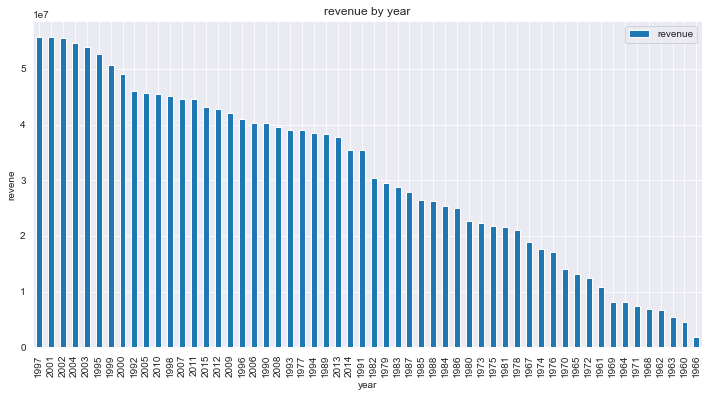

In [22]:
# Step 2: Plotting a bar chart of the result sorted by revenue

(df.groupby('release_year')[['revenue']].mean()
     .sort_values('revenue', ascending=False)
     .plot(kind='bar', 
           figsize=(12,6), 
           xlabel='year', 
           ylabel='revene', 
           title='revenue by year'));

####  Research Question 1A:  (Is **budget** associated with high revenue?)

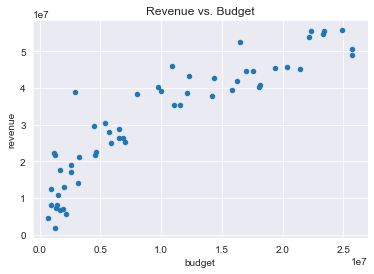

In [23]:
# To check the relationship between budget and revenue by year
    # Step 1: perform mean aggregate operation on the revenue and budget and groupby release_year
    # Step 2: Plot a scatter diagram to check for correlation

(df.groupby('release_year')
     .agg({'budget': 'mean', 'revenue': 'mean'})
     .plot(kind='scatter', x='budget', y='revenue',
          xlabel='budget',
          ylabel='revenue', 
          title='Revenue vs. Budget'));

In [86]:
# correlation coefficient for revenue and budget

df['revenue'].corr(df['budget'])

0.7346076180874243

- The plot above show there is a positive correlation between budget and revenue
- The correlation coefficient of 0.73 indicates that the correlation is moderate

#### Research Question 1B:  (Do movies with high runtime have high revenue)

In [24]:
# To check the relationship between runtime and revenue by year
    # Step 1: perform mean aggregate operation on the revenue and runtime and groupby release_year
    # Step 2: Plot a scatter diagram to check for correlation

df.groupby('release_year').agg({'runtime': 'mean', 'revenue': 'mean'}).sort_values('revenue', ascending=False).head(10)

,runtime,revenue
release_year,,
1997,106.675393,5.578625e+07
2001,108.024896,5.564350e+07
2002,106.969697,5.546820e+07
2004,105.364821,5.470301e+07
2003,100.679715,5.387275e+07
1995,107.574713,5.262265e+07
1999,108.861607,5.069515e+07
2000,104.620536,4.901206e+07
1992,107.113636,4.604662e+07


- From the above table, it shows that movies whose runtime is above 100mins have high revenue

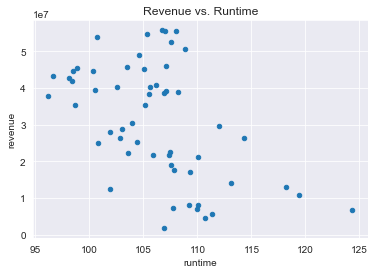

In [25]:
# plotting a scatter plot of revenue vs. runtime

(df.groupby('release_year')
     .agg({'runtime': 'mean', 'revenue': 'mean'})
     .sort_values('revenue', ascending=False)
     .plot(kind='scatter', 
           x='runtime', 
           y='revenue', 
           title='Revenue vs. Runtime'));

- A scatterplot of runtime against revenue shows ther is no correlation between runtime and revenue

#### Research Question 1C:  (Does **popularity** of the movie determine high revenue?)

In [26]:
# To check the relationship between popularity and revenue by year
    # Step 1: perform mean aggregate operation on the revenue and popularity and groupby release_year
    # Step 2: Plot a scatter diagram to check for correlation
    
    
(df.groupby('release_year')
     .agg({'popularity': 'mean', 'revenue': 'mean'})
     .sort_values(by=['popularity', 'revenue'], ascending=[0, 0]).head(10))

,popularity,revenue
release_year,,
2015,1.043092,4.316524e+07
2014,0.902106,3.541433e+07
2004,0.722438,5.470301e+07
2003,0.719083,5.387275e+07
1995,0.714641,5.262265e+07
1997,0.714033,5.578625e+07
2002,0.705411,5.546820e+07
2001,0.705034,5.564350e+07
2011,0.682350,4.454059e+07


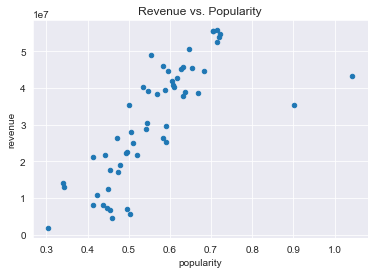

In [27]:
# plotting a scatter plot of revenue vs popularity

(df.groupby('release_year')
     .agg({'popularity': 'mean', 'revenue': 'mean'})
     .plot(kind='scatter', 
           x='popularity', 
           y='revenue', 
           title='Revenue vs. Popularity'));

In [85]:
# correlation coefficient for the two variables

df['revenue'].corr(df['popularity'])

0.6629944667994516

- The scatter plot above show that there is a moderate positive correlation betweeen popularity and revenue also indicated by the correlation coefficient of 0.66

### Research Question 2 (What kind of properties are associated with movies with high rating?)

#### Exploratory data analysis on vote_average ratings

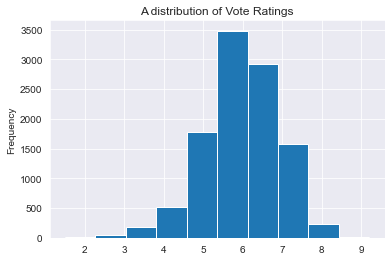

In [28]:
# To check the distribution of the vote_average

(df.vote_average.plot(kind='hist', 
                      xlabel='vote_rating', 
                      ylabel='frequency', 
                      title='A distribution of Vote Ratings'));

- The plot above show that the vote_average distribution is skewed to the left

### Research Question 2A:  (Is budget associated with high rating?)
- To check the relationship between budget and vote_average by year

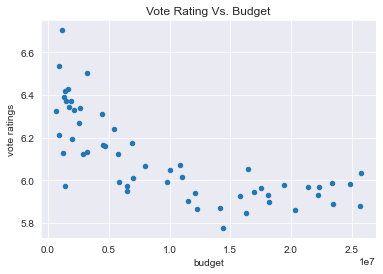

In [29]:
# Step 1: perform mean aggregate operation on the vote_average and budget and groupby release_year
# Step 2: Plot a scatter diagram to check for correlation 

(df.groupby('release_year')
     .agg({'vote_average': 'mean', 'budget': 'mean'})
     .plot(kind='scatter', 
           y='vote_average', 
           x='budget', 
           title='Vote Rating Vs. Budget', 
           ylabel='vote ratings', 
           xlabel='budget'));

In [87]:
# to get correlation coeffient between vote rating and budget

df['vote_average'].corr(df['budget'])

0.0855997271410978

- The scatter plot above shows that there is no correlation between vote_average ratings and budget

### Research Question 2B:  (Is popularity associated with high rating?)
- To check the relationship between popularity and vote_average by year

In [30]:
# The code below shows the vote_rating by popularity groupby release_year and sorted by 10 highest popular

(df.groupby('release_year')
     .agg({'popularity': 'mean', 'vote_average': 'mean'})
     .sort_values('popularity', ascending=0)
     .head(10))

,popularity,vote_average
release_year,,
2015,1.043092,5.864194
2014,0.902106,5.901747
2004,0.722438,5.988599
2003,0.719083,5.930961
1995,0.714641,6.052299
1997,0.714033,5.983246
2002,0.705411,5.970455
2001,0.705034,5.890871
2011,0.682350,5.943421


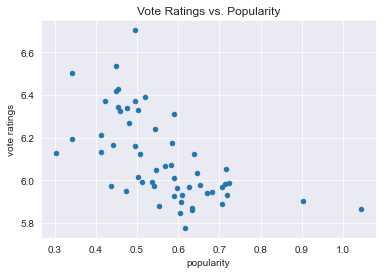

In [31]:
# plotting a scatter plot of vote rating vs. popularity

(df.groupby('release_year')
     .agg({'popularity': 'mean', 'vote_average': 'mean'})
     .plot(kind='scatter', 
           y='vote_average', 
           x='popularity', 
           xlabel='popularity', 
           ylabel='vote ratings', 
           title='Vote Ratings vs. Popularity'));

In [91]:
# to get correlation coeffient between vote rating and popularity

df['vote_average'].corr(df['popularity'])

0.21556890732889963

- There is no correlation between popularity and vote rating

### Research Question 2C:  (Is vote_count associated with high vote_rating?)
- To check the relationship between vote_count and vote_rating by year

In [32]:
# The code below shows the vote_rating by vote_counts groupby release_year and sorted by 10 highest vote_counts

(df.groupby('release_year')
     .agg({'vote_count': 'mean', 'vote_average': 'mean'})
     .sort_values('vote_count', ascending=0).head(10))

,vote_count,vote_average
release_year,,
2013,328.287902,5.868147
2012,318.210069,5.777083
2014,299.804949,5.901747
2015,293.861290,5.864194
2010,269.497925,5.976763
2001,261.601660,5.890871
2004,257.980456,5.988599
2011,254.295113,5.943421
2003,243.505338,5.930961


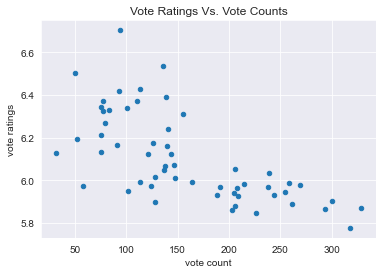

In [33]:
# plotting a scatter plot of vote rating vs. vote count

(df.groupby('release_year')
     .agg({'vote_count': 'mean', 'vote_average': 'mean'})
     .plot(kind='scatter', 
           y='vote_average', 
           x='vote_count', 
           xlabel='vote count', 
           ylabel='vote ratings', 
           title='Vote Ratings Vs. Vote Counts'));

In [89]:
df['vote_count'].corr(df['vote_average'])

0.2586835757539896

- There is weak positive correlation between vote count and vote ratings

### Research Question 2D:  (Is runtime associated with high vote_rating?)
- To check the relationship between runtime and vote_rating by year

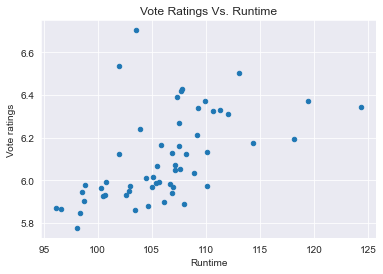

In [34]:
# plotting a scatter plot of vote ratings vs.runtime

(df.groupby('release_year')
     .agg({'runtime': 'mean', 'vote_average': 'mean'})
     .plot(kind='scatter', 
           x='runtime', 
           y='vote_average', 
           xlabel='Runtime', 
           ylabel='Vote ratings', 
           title='Vote Ratings Vs. Runtime'));

In [90]:
df['vote_average'].corr(df['runtime'])

0.171844503232652

- There is no correlation between vote ratings and runtime as indicated by the correlation coefficient of 0.17

### Research Question 3 (which genre has the highest revenue year to year?)

- A movie genre are different categories in which movies are placed 
- There are many movie genres but we will explore top five(5) genres according to [market share for each genre in 2021](https://the-numbers.com/market/2021/genres) which include: Action, Adventure, Horror, Comedy, Drama

In [35]:
# Create a new copy of our dataframe 

new_df = df.copy()

In [36]:
# create a new DataFrame which will contain new columns for the five(5) different genres

df1 = (new_df.assign(
             genre_action = np.where(new_df.genres.str.contains('Action'), 'Action', " "),
             genre_adventure = np.where(new_df.genres.str.contains('Adventure'), 'Adventure', " "),
             genre_horror = np.where(new_df.genres.str.contains('Horror'), 'Horror', " "),
             genre_drama = np.where(new_df.genres.str.contains('Drama'), 'Drama', " "),
             genre_comedy = np.where(new_df.genres.str.contains('Comedy'), 'Comedy', " "),
             ))

In [37]:
# viewing the first 2 rows of the new dataframe

df1.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_action,genre_adventure,genre_horror,genre_drama,genre_comedy
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,,,
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,,,


In [38]:
# Filter the new dataframe for genre category = Action

genre_action = df1.query('genre_action=="Action"')

In [39]:
# perform an aggregate operation on the action revenue grouped by year

g_action_revenue = genre_action.groupby(['release_year']).agg(genre_action_revenue=('revenue', 'mean'))
g_action_revenue.head()

,genre_action_revenue
release_year,
1960,8.113125e+06
1961,4.742857e+06
1962,1.370000e+07
1963,2.222469e+07
1964,2.498000e+07


In [40]:
# Filter the new dataframe for genre category = Adventure

genre_adventure = df1.query('genre_adventure=="Adventure"')

In [41]:
# perform an aggregate operation on the adventure revenue grouped by year

g_adventure_revenue = genre_adventure.groupby(['release_year']).agg(genre_adventure_revenue=('revenue', 'mean'))
g_adventure_revenue.head()

,genre_adventure_revenue
release_year,
1960,9.810000e+05
1961,4.079667e+07
1962,2.565714e+07
1963,1.198554e+07
1964,2.498000e+07


In [42]:
# Filter the new dataframe for genre category = Horror

genre_horror = df1.query('genre_horror=="Horror"')

In [43]:
# perform an aggregate operation on the horror revenue grouped by year

g_horror_revenue = genre_horror.groupby(['release_year']).agg(genre_horror_revenue=('revenue', 'mean'))
g_horror_revenue.head()

,genre_horror_revenue
release_year,
1960,4.571429e+06
1961,6.666667e+05
1962,2.500000e+05
1963,1.267059e+06
1964,0.000000e+00


In [44]:
# Filter the new dataframe for genre category = Drama

genre_drama = df1.query('genre_drama=="Drama"')

In [45]:
# perform an aggregate operation on the drama revenue grouped by year

g_drama_revenue = genre_drama.groupby(['release_year']).agg(genre_drama_revenue=('revenue', 'mean'))
g_drama_revenue.head()

,genre_drama_revenue
release_year,
1960,9.461538e+06
1961,6.971261e+06
1962,6.665707e+06
1963,5.596154e+06
1964,5.022014e+06


In [46]:
# Filter the new dataframe for genre category = Comedy

genre_comedy = df1.query('genre_comedy=="Comedy"')

In [47]:
# perform an aggregate operation on the comedy revenue grouped by year

g_comedy_revenue = genre_comedy.groupby(['release_year']).agg(genre_comedy_revenue=('revenue', 'mean'))
g_comedy_revenue.head()

,genre_comedy_revenue
release_year,
1960,6.012500e+06
1961,2.343800e+07
1962,1.600000e+06
1963,1.873284e+06
1964,7.817611e+06


In [48]:
# We will join each genre revenue using merge

merge_revenue = (g_action_revenue.merge(g_adventure_revenue, on='release_year')
                 .merge(g_horror_revenue, on='release_year')
                 .merge(g_drama_revenue, on='release_year')
                 .merge(g_comedy_revenue, on='release_year'))

In [49]:
# this code shows the revenue generated for each genre in the last six years

merge_revenue.tail(6)

,genre_action_revenue,genre_adventure_revenue,genre_horror_revenue,genre_drama_revenue,genre_comedy_revenue
release_year,,,,,
2010,7.198879e+07,1.604595e+08,1.666114e+07,2.748467e+07,4.205126e+07
2011,8.836760e+07,1.730029e+08,1.099964e+07,2.233772e+07,4.381796e+07
2012,1.105363e+08,2.292376e+08,1.140407e+07,3.444969e+07,3.985771e+07
2013,8.389527e+07,1.556545e+08,1.882700e+07,2.349221e+07,3.658638e+07
2014,1.019630e+08,1.752065e+08,8.749080e+06,2.270023e+07,3.758011e+07
2015,1.246932e+08,1.974879e+08,7.751373e+06,2.459538e+07,4.740245e+07


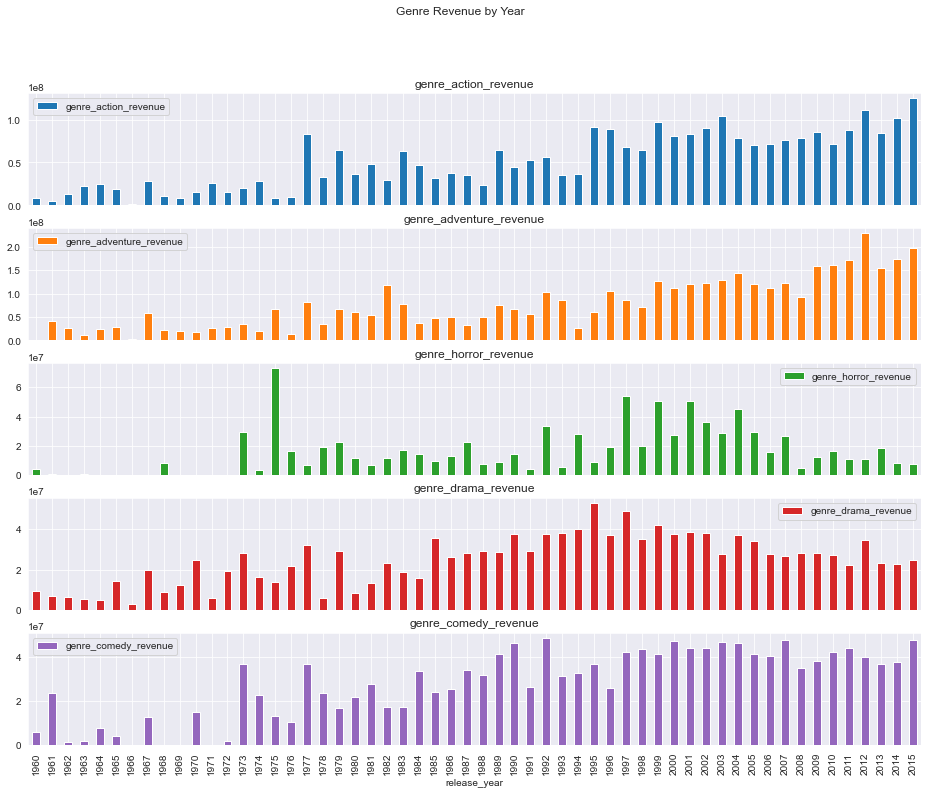

In [50]:
# plotting a bar chart of each genre revenue by year as a subplot

merge_revenue.plot(kind='bar', figsize=(16,12), subplots=True, title='Genre Revenue by Year');

- Creating a **custom function** for plotting line charts

In [73]:
def plot_line_chart(a, b, c, d):
    """this function plots a line chart for variable a
        b is the x-axis label
        c is the y-axis label
        d is the title description
    """
    z = a.plot(kind='line', xlabel=b, ylabel=c, title=d, subplots=True, figsize=(16, 14))
    return z

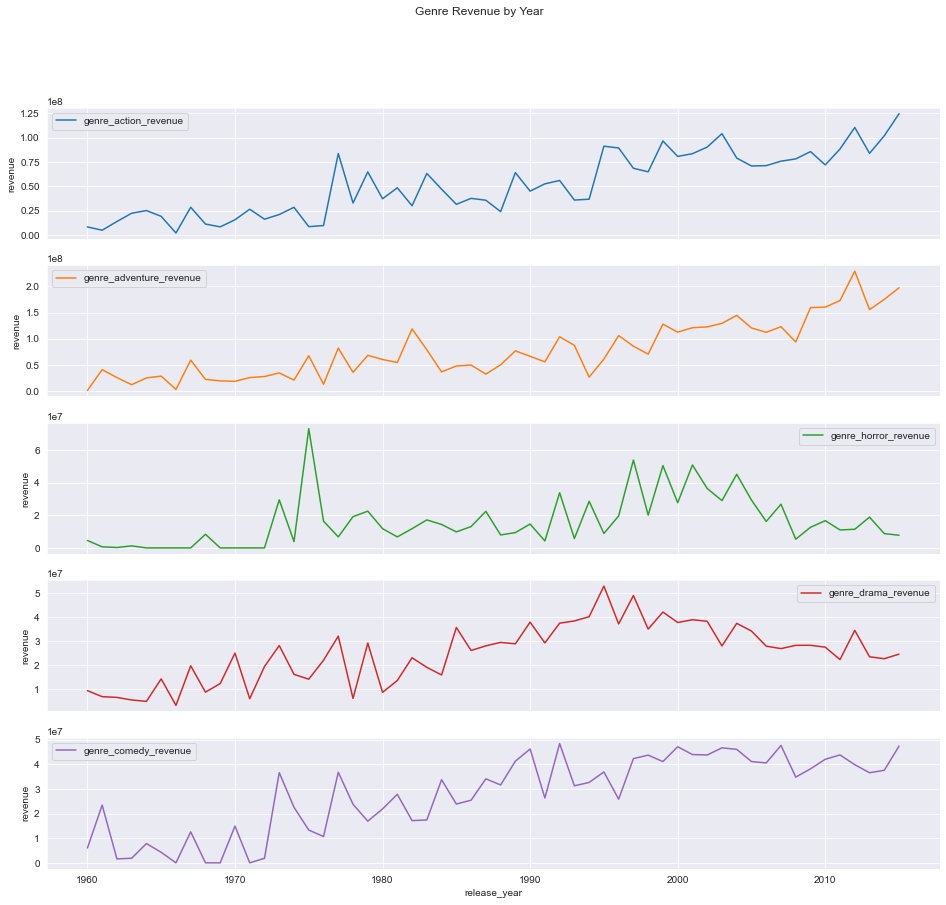

In [74]:
# plotting a line chart of the trend of each genre revenue over the years

plot_line_chart(merge_revenue, 'release_year', 'revenue', 'Genre Revenue by Year');

- From the line chart, we can see that revenue for action, adventure and commedy genres increases over the year, while horror genre revenue decreases over the year

### Research Question 4 (Which genre are the most popular from year to year?)

In [53]:
# perform an aggregate operation on the action_genre popularity grouped by year

g_action_popularity = genre_action.groupby('release_year').agg(action_popularity=('popularity', 'mean'))
g_action_popularity.head()

,action_popularity
release_year,
1960,0.590724
1961,0.365913
1962,0.708945
1963,0.951729
1964,0.813087


In [54]:
# perform an aggregate operation on the adventure_genre popularity grouped by year

g_adventure_popularity = genre_adventure.groupby('release_year').agg(adventure_popularity=('popularity', 'mean'))
g_adventure_popularity.head()

,adventure_popularity
release_year,
1960,0.700981
1961,0.767323
1962,0.942513
1963,0.728487
1964,0.736431


In [55]:
# perform an aggregate operation on the horror_genre popularity grouped by year

g_horror_popularity = genre_horror.groupby('release_year').agg(horror_popularity=('popularity', 'mean'))
g_horror_popularity.head()

,horror_popularity
release_year,
1960,0.591450
1961,0.254578
1962,0.179368
1963,0.376901
1964,0.189650


In [56]:
# perform an aggregate operation on the drama_genre popularity grouped by year

g_drama_popularity = genre_drama.groupby('release_year').agg(drama_popularity=('popularity', 'mean'))
g_drama_popularity.head()

,drama_popularity
release_year,
1960,0.566305
1961,0.432233
1962,0.392000
1963,0.322448
1964,0.364818


In [57]:
# perform an aggregate operation on the comedy_genre popularity grouped by year

g_comedy_popularity = genre_comedy.groupby('release_year').agg(comedy_popularity=('popularity', 'mean'))
g_comedy_popularity.head()

,comedy_popularity
release_year,
1960,0.396000
1961,0.679838
1962,0.273183
1963,0.444481
1964,0.491229


In [58]:
# We will join each genre popularity using merge method

merge_popularity = (g_action_popularity.merge(g_adventure_popularity, on='release_year')
                 .merge(g_horror_popularity, on='release_year')
                 .merge(g_drama_popularity, on='release_year')
                 .merge(g_comedy_popularity, on='release_year'))

In [59]:
# this code show the popularity of each genre in the last five years

merge_popularity.tail()

,action_popularity,adventure_popularity,horror_popularity,drama_popularity,comedy_popularity
release_year,,,,,
2011,1.058096,1.146888,0.521678,0.601289,0.672813
2012,1.131179,1.461478,0.434316,0.607610,0.598057
2013,1.009001,1.260832,0.491909,0.660076,0.603933
2014,1.682013,2.430526,0.483898,0.867474,0.870541
2015,2.272209,3.283786,0.476670,0.937877,0.938527


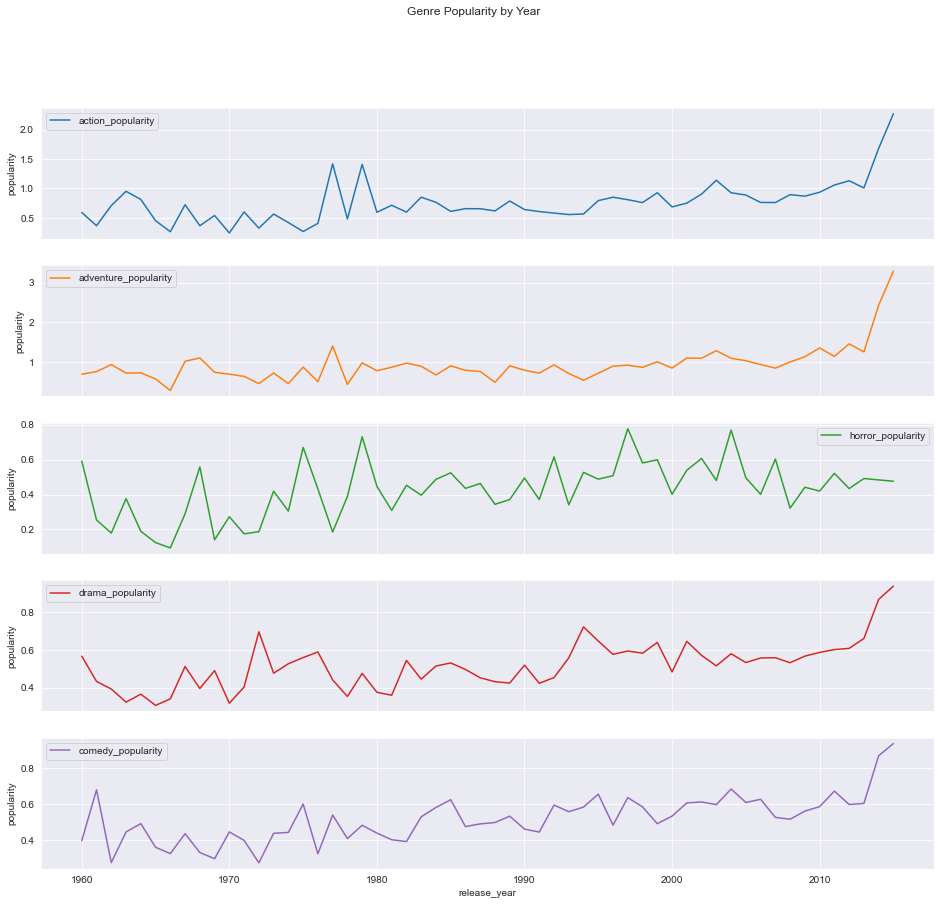

In [75]:
# plotting a line chart of the trend of each genre popularity over the years

plot_line_chart(merge_popularity, 'release_year', 'popularity', 'Genre Popularity by Year');

- The line charts above shows the trend of each genre popularity over the years
- Action genre and Adventure genre show a gradual increase in popularity. Their popularity spiked in recent years from 2012
- Drama and comedy also saw a spiked increase around the same time as action and adventure

<a id='conclusions'></a>
## Conclusions

### Research Question 1 (What kind of properties are associated with movies that have high revenue?)

- Budget is associated with high revenue as shown by positive correlation of the plot below

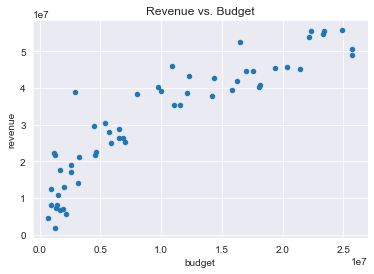

In [61]:
# A scatter plot of revenue and budget

(df.groupby('release_year')
     .agg({'budget': 'mean', 'revenue': 'mean'})
     .plot(kind='scatter', x='budget', y='revenue',
          xlabel='budget',
          ylabel='revenue', 
          title='Revenue vs. Budget'));

- Popularity is associated with high revenue as shown by the positive correlation of the plot below

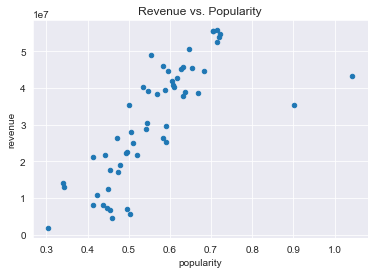

In [62]:
# scatter plot of revenue vs popularity

(df.groupby('release_year')
     .agg({'popularity': 'mean', 'revenue': 'mean'})
     .plot(kind='scatter', 
           x='popularity', 
           y='revenue', 
           title='Revenue vs. Popularity'));

Budget and popularity of the movies are two properties found to be associated with high revenue. They show a strong positive correlation with revenue

### Research Question 2 (What kind of properties are associated with movies with high rating?)

- Run time is associated with high rating as shown by the positive correlation of the plot below

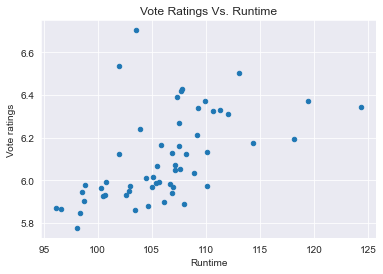

In [63]:
# a scatter plot of vote ratings vs. runtime

(df.groupby('release_year')
     .agg({'runtime': 'mean', 'vote_average': 'mean'})
     .plot(kind='scatter', 
           x='runtime', 
           y='vote_average', 
           xlabel='Runtime', 
           ylabel='Vote ratings', 
           title='Vote Ratings Vs. Runtime'));

- Vote count is not associated with high ratings as shown by the negative correlationof the plot below

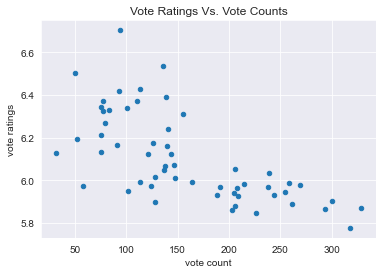

In [64]:
# a scatter plot of vote rating vs. vote count

(df.groupby('release_year')
     .agg({'vote_count': 'mean', 'vote_average': 'mean'})
     .plot(kind='scatter', 
           y='vote_average', 
           x='vote_count', 
           xlabel='vote count', 
           ylabel='vote ratings', 
           title='Vote Ratings Vs. Vote Counts'));

### Research Question 3 (which genre has the highest revenue year to year?)

- Three genres revenues **(Action, Adventure, Comedy)** show **increase** over the years as shown by the plot below

In [79]:
# The code below merge the revenue of three genres; action, adventure, comedy

top_three_revenue_genre = (g_action_revenue.merge(g_adventure_revenue, on='release_year')
                 .merge(g_comedy_revenue, on='release_year'))

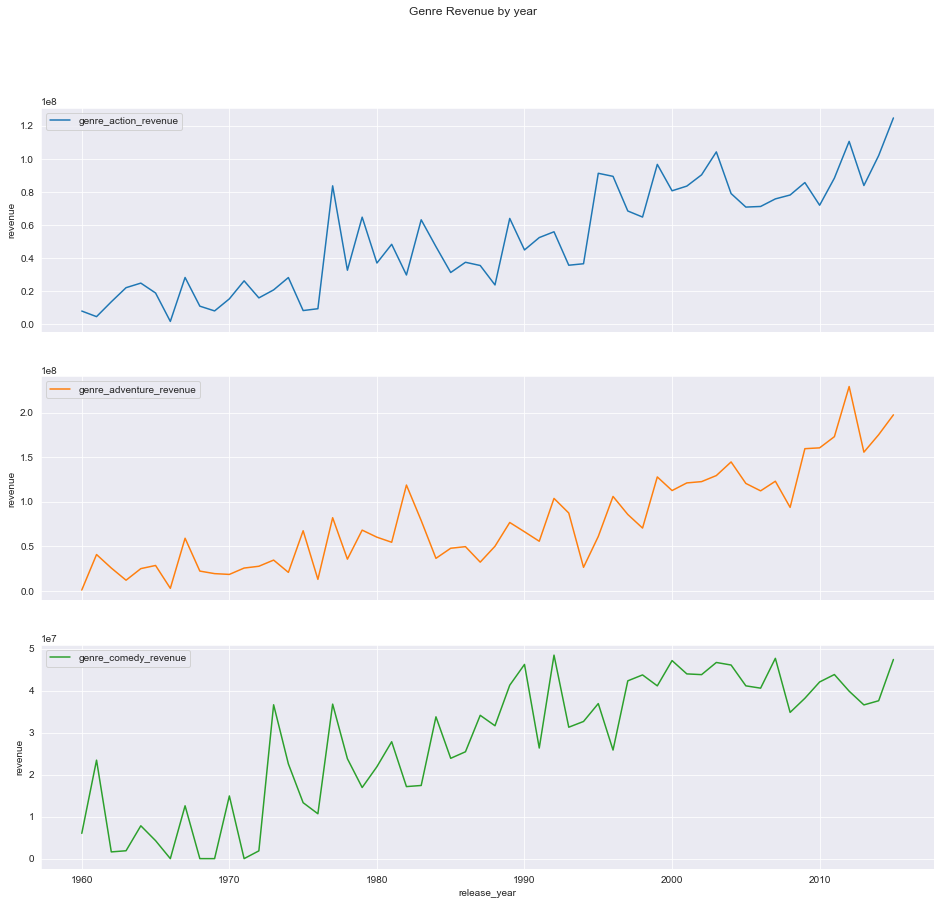

In [80]:
# Plotting a line chart of the top three genre by revenue over the years

plot_line_chart(top_three_revenue_genre, 'release_year', 'revenue', 'Genre Revenue by year');

- There is an increase in revenue generated by these three genres which fluctuated over the years 
- adventure_genre revenue peaked at 2012 generating over 200millions
- action_genre revenue also peaked at 2015 generating over 100millions
- Adventure_genre revenue generated top in recent year from 2000 to 2015 with over 100millions

### Research Question 4 (Which genre are the most popular from year to year?)

- Two genres **(Action and Adventure)** show **high popularity** over the years as indicated by the plot below

In [82]:
# The code below merge the popularities of top two genres; action and adventure

top_two_popular_genre = (g_action_popularity.merge(g_adventure_popularity, on='release_year'))

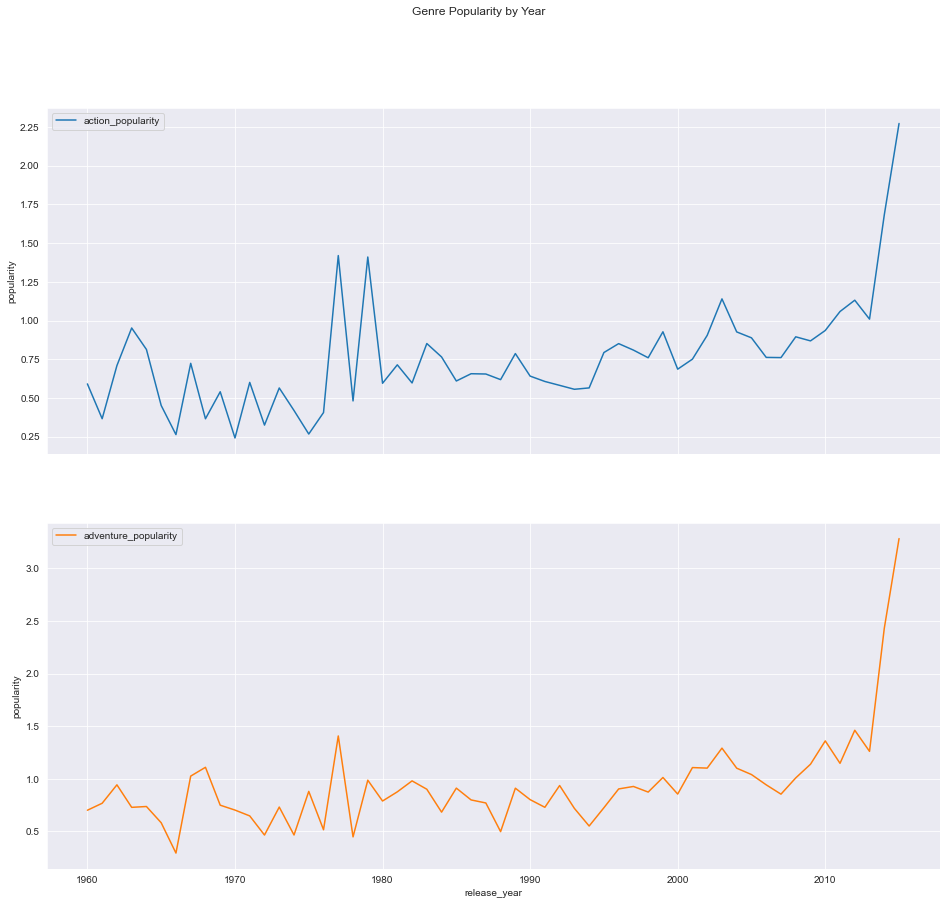

In [83]:
# Plotting a line chart of the top two genre by popularity over the years

plot_line_chart(top_two_popular_genre, 'release_year', 'popularity', 'Genre Popularity by Year');

- The line charts above shows the trend of top two genre by popularity over the years
- Action genre and Adventure genre show a gradual increase in popularity which fluctuated. Their popularity increased rapidly from 2012 to 2015

### Limitation

- Each movie belongs to more than one genre category. This may have affected the genre category where the movies may have had a high/low revenue or popularity

- Since there are many genre category, we limited our exploratory analysis to top five genres [based on top grossing in 2021](https://the-numbers.com/market/2021/genres). So further analysis should be done for other genre categories 

### References

- https://the-numbers.com/market/2021/genres
- https://www.researchgate.net/publication/281467495_Statistical_Patterns_in_Movie_Rating_Behavior